In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Manipulation

## Diamonds

In [2]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
# Import data and describe
diamonds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4510/2025-Fall-Lecture/Final-Exam-4510/diamonds_casestudy.csv')
diamonds.head(n=5)

,carat,cut,color,clarity,depth,table,price,width,length,height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75




*   Carat: Size
*   Cut: Brilliance: Ideal -> Premium -> Very Good -> Good -> Fair -> Poor
*   Clarity: Nubmer of natural flaws: IF (best) -> VVS1 -> VVS2 -> VS1 -> VS2 -> SI1 -> SI2 -> I1 (worst)
*   Color: Clear to yellow tint: D-F (clear- Colorless) -> G-J (near colorless), K-M (yellow tint)

In [4]:
print(diamonds.shape) #how many rows?
print(len(diamonds))
diamonds.size


(53940, 10)
53940


539400

### Row subsetting - boolean expression

In [5]:
# boolean expression

#(diamonds.height > 5.43) & (diamonds["length"] > 9.5)

(diamonds.price > 20000) & (diamonds["carat"] > 2)

#diamonds['pirce'] >20000)

,0
0,False
1,False
2,False
3,False
4,False
...,...
53935,False
53936,False
53937,False
53938,False


In [8]:
#Count # of diamonds satisfying the conditions below:
((diamonds.price > 18000) & (diamonds["carat"] > 2.8)).sum()

# & -> and operator
#  | --> or operator

# You can use len or shape


np.int64(12)

In [15]:
# Count # of diamonds whose color = premium and clarity is IF and color is equal to D
((diamonds.cut == "Ideal") & (diamonds.clarity == "IF") & (diamonds.color == "D")).sum()


np.int64(28)

### Groupby

In [16]:
# Average price of the diamonds with Fair cut --> Hint: you should use gropuby

print(diamonds.groupby('cut')['price'].mean())

print("******************************************************")

#Another method:
print(diamonds.groupby(by = ['cut']).mean(numeric_only=True))
# Note that mean() can be applied to the columns with numerical values

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64
******************************************************
              carat      depth      table        price     width    length  \
cut                                                                          
Fair       1.046137  64.036839  59.053789  4358.757764  6.246894  6.182652   
Good       0.849185  62.365436  58.694639  3928.864452  5.838785  5.850744   
Ideal      0.702837  61.709344  55.951668  3457.541970  5.507451  5.520080   
Premium    0.891955  61.264177  58.746095  4584.257704  5.973887  5.944879   
Very Good  0.806381  61.817683  57.956150  3981.759891  5.740696  5.770026   

             height  
cut                  
Fair       3.982770  
Good       3.639507  
Ideal      3.401448  
Premium    3.647124  
Very Good  3.559801  


### For each color, what is the average carat?


In [17]:
# Hint --> use groupby

### missing values

In [18]:
diamonds.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,50
table,0
price,0
width,0
length,0
height,0


In [20]:
#What is the expression to replace the missing values for depth with its mean?

depth_mean = diamonds['depth'].mean() #you need to calculate the average/mean value of the column, depth

new_data_frame = diamonds[['depth']].fillna(value=depth_mean)  #Not going to change the orginal dataframe diamonds

print(new_data_frame)

       depth
0       61.5
1       59.8
2       56.9
3       62.4
4       63.3
...      ...
53935   60.8
53936   63.1
53937   62.8
53938   61.0
53939   62.2

[53940 rows x 1 columns]


In [ ]:
#If you want to permanently change the orignal datafrmae, diamonds

#diamonds['depth'] = diamonds[['depth']].fillna(value=depth_mean)
# Be carefull!! - don't this unless you want to change the original dataframe forever

#diamonds.isnull().sum()

# Logit Regiression - Chapter 7.5

In [21]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [26]:
WBCD = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/4510/2025-Fall-Lecture/Final-Exam-4510/WisconsinBreastCancerDatabase.csv")
WBCD.head()

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
WBCD[['Radius mean', 'Diagnosis']]  # column subsetting

,Radius mean,Diagnosis
0,17.99,M
1,20.57,M
2,19.69,M
3,11.42,M
4,20.29,M
...,...,...
564,21.56,M
565,20.13,M
566,16.60,M
567,20.60,M


In [28]:
WBCD.loc[0:5] #row subsetting

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [29]:
WBCD.loc[WBCD['Diagnosis'] == 'M', 'Diagnosis']  # returns rows with Diagnosis == M and shows only Diaganosis column
WBCD.loc[WBCD['Diagnosis'] == 'M', 'Diagnosis'] = 1 # Diaganois column becomes 1 if Dianosis == M --> replace M with 1



WBCD.loc[WBCD['Diagnosis'] == 'B', 'Diagnosis'] = 0  # replace B with 0

WBCD[['Radius mean', 'Diagnosis']]

,Radius mean,Diagnosis
0,17.99,1
1,20.57,1
2,19.69,1
3,11.42,1
4,20.29,1
...,...,...
564,21.56,1
565,20.13,1
566,16.60,1
567,20.60,1


In [30]:
# Store relevant columns as variables
X = WBCD[['Radius mean']].values.reshape(-1, 1)
#.values give the underlying Numpy array with the same shape (nsamples, 1)
#.reshape(-1, 1) tells Numpy "make it 2-D with 1 column"

y = WBCD[['Diagnosis']].values.reshape(-1, 1).astype(int)
#astype is used with Pandas DataFrames to convert data types in a column to
#integer type.

print(X) # X is a 2d array
print(y) # y is a 2d array
print(type(y))

[[17.99 ]
 [20.57 ]
 [19.69 ]
 [11.42 ]
 [20.29 ]
 [12.45 ]
 [18.25 ]
 [13.71 ]
 [13.   ]
 [12.46 ]
 [16.02 ]
 [15.78 ]
 [19.17 ]
 [15.85 ]
 [13.73 ]
 [14.54 ]
 [14.68 ]
 [16.13 ]
 [19.81 ]
 [13.54 ]
 [13.08 ]
 [ 9.504]
 [15.34 ]
 [21.16 ]
 [16.65 ]
 [17.14 ]
 [14.58 ]
 [18.61 ]
 [15.3  ]
 [17.57 ]
 [18.63 ]
 [11.84 ]
 [17.02 ]
 [19.27 ]
 [16.13 ]
 [16.74 ]
 [14.25 ]
 [13.03 ]
 [14.99 ]
 [13.48 ]
 [13.44 ]
 [10.95 ]
 [19.07 ]
 [13.28 ]
 [13.17 ]
 [18.65 ]
 [ 8.196]
 [13.17 ]
 [12.05 ]
 [13.49 ]
 [11.76 ]
 [13.64 ]
 [11.94 ]
 [18.22 ]
 [15.1  ]
 [11.52 ]
 [19.21 ]
 [14.71 ]
 [13.05 ]
 [ 8.618]
 [10.17 ]
 [ 8.598]
 [14.25 ]
 [ 9.173]
 [12.68 ]
 [14.78 ]
 [ 9.465]
 [11.31 ]
 [ 9.029]
 [12.78 ]
 [18.94 ]
 [ 8.888]
 [17.2  ]
 [13.8  ]
 [12.31 ]
 [16.07 ]
 [13.53 ]
 [18.05 ]
 [20.18 ]
 [12.86 ]
 [11.45 ]
 [13.34 ]
 [25.22 ]
 [19.1  ]
 [12.   ]
 [18.46 ]
 [14.48 ]
 [19.02 ]
 [12.36 ]
 [14.64 ]
 [14.62 ]
 [15.37 ]
 [13.27 ]
 [13.45 ]
 [15.06 ]
 [20.26 ]
 [12.18 ]
 [ 9.787]
 [11.6  ]
 [14.42 ]


In [31]:
np.ravel(y.astype(int)) # Note that ravel flattens 2d array to 1d array

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [32]:
logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y.astype(int)))

LogisticRegression()

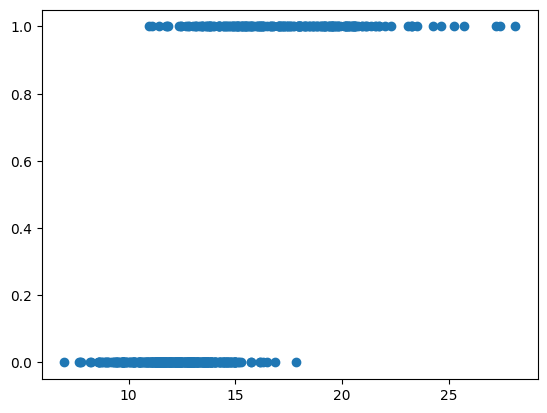

In [33]:
plt.scatter(X,y)

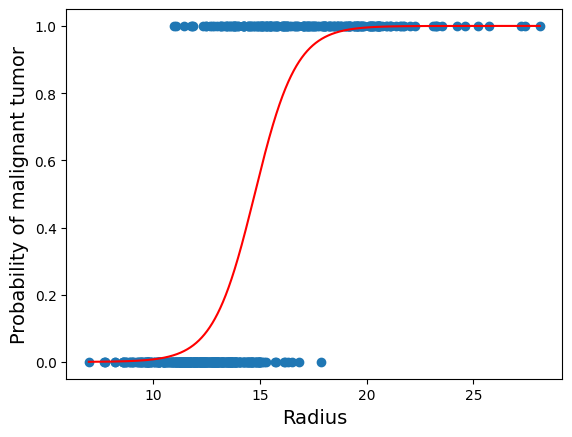

In [34]:
plt.scatter(X,y)
xDelta = np.linspace(X.min(), X.max(), 10000)
yPredicted = logisticModel.predict(X).reshape(-1,1).astype(int) #either 0 or 1

#note that [:,1] is used below --> probability of tumor being malignant
yDeltaProb = logisticModel.predict_proba(xDelta.reshape(-1,1))[:,1]

plt.plot(xDelta, yDeltaProb, color ="red")
plt.xlabel("Radius", fontsize=14)
plt.ylabel("Probability of malignant tumor", fontsize=14)
plt.show()

In [35]:
logisticModel.coef_

array([[1.02519623]])

In [36]:
logisticModel.coef_[0][0]  #b1 value

np.float64(1.0251962293185457)

In [37]:
logisticModel.intercept_   #b0  value

array([-15.12718591])

### b1 value is positive and b0 is negative --> what does it mean?

In [38]:
pHatProb = logisticModel.predict_proba([[13]])
pHatProb
#This indicates the predicted probabilities for the two classes (Benign and Malignant)
#given an input feature value (e.g., Radius Mean of 13):

# 0.85: The model predicts an 85% probability that the tumor is Benign.
# 0.15: The model predicts a 15% probability that the tumor is Malignant.

array([[0.85810449, 0.14189551]])

In [39]:
pHat = logisticModel.predict([[13]])
pHat

array([0])

### Training, Validation and test data set --> train_test_split() - Section 8.2

In [41]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
trainingProportion = 0.70
validationProportion = 0.10
testProportion = 0.20



# Split off the test data
trainingAndValidationData, testData = train_test_split(
    WBCD, test_size=testProportion
)# Set the proportions of the training-validation-test split
#Note that test_size is used!



# Split the remaining into training and validation data
trainingData, validationData = train_test_split(
    WBCD,
    train_size=trainingProportion / (trainingProportion + validationProportion)
)
#Note that train_size is used instead of test_size!

#### how many rows for training data, validationData and testingData?

## Regression Metrics - Numerical Variables (Chapter 8-3)



*   Use the different data set (exam-customer.csv file)




In [91]:
customer = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/4510/2025-Fall-Lecture/Final-Exam-4510/exam-customer.csv")
customer.head()

,CustID,Sex,Race,BirthDate,College,HouseholdSize,ZipCode,Income,Spending2020,Spending2021,NumOfOrders,DaysSinceLast,Satisfaction,Channel
0,1530016,Female,Black,12/16/1986,Yes,5,90047,53000,287.0,241.0,3,101,Very Dissatisfied,SM
1,1531136,Male,White,5/9/1993,Yes,5,90026,94000,1227.0,843.0,12,262,Neutral,TV
2,1532160,Male,Black,5/22/1966,Yes,2,90027,64000,523.0,719.0,9,122,Very Satisfied,TV
3,1532307,Male,White,9/16/1964,Yes,4,90029,60000,516.0,582.0,13,129,Very Dissatisfied,SM
4,1532356,Female,Hispanic,7/15/1964,No,5,90017,47000,555.0,845.0,7,97,Very Dissatisfied,Web


In [75]:
customer.isnull().sum()

,0
CustID,0
Sex,0
Race,0
BirthDate,0
College,0
HouseholdSize,0
ZipCode,0
Income,0
Spending2020,7
Spending2021,5


In [76]:
# to simply the process, drop all the rows with the missing values, NaN.
customer = customer.dropna()
customer.isnull().sum()

,0
CustID,0
Sex,0
Race,0
BirthDate,0
College,0
HouseholdSize,0
ZipCode,0
Income,0
Spending2020,0
Spending2021,0


In [77]:
# Import packages
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [78]:
X = customer["Spending2020"]
y = customer['Spending2021']

In [79]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

print(type(X_test))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [80]:
# Create a linear model using the training set and predictions using the test set

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
linModel = LinearRegression()
linModel.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1)) # Fit

y_pred = np.ravel(linModel.predict(X_test.reshape(-1, 1)))  # Predict

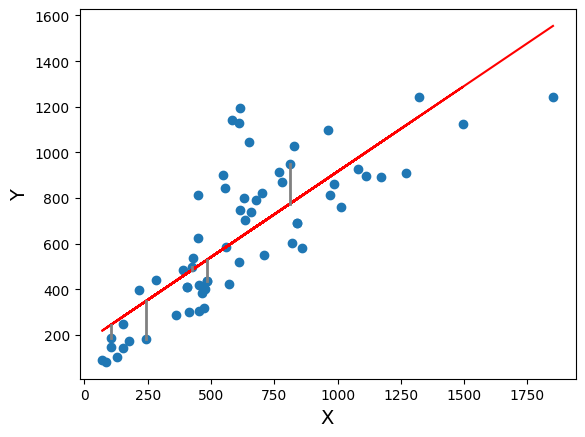

In [81]:
# Display linear model and scatter plot of the test set
plt.scatter(X_test, y_test)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.plot(X_test, y_pred, color='red')

for i in range(5):
    plt.plot([X_test[i], X_test[i]], [y_test[i], y_pred[i]], color='grey', linewidth=2)

In [82]:
# Display MSE
#metrics.mean_squared_error(y_test, y_pred)
mean_squared_error(y_test, y_pred)

37265.325706168165

In [84]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

np.float64(193.04228994230297)

In [85]:
#Display MAE
metrics.mean_absolute_error(y_test, y_pred)

155.4150838359777

### What are the mathematical expressions for MSE, RMSE, and MAE?

## Classification Metrics (section 8.4)

In [87]:
# Import packages and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [88]:
# Load the Wisconsin Breast Cancer dataset
WBCD = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4510/2025-Fall-Lecture/Ch8-Performance/Data/WisconsinBreastCancerDatabase.csv')
WBCD.head()

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [89]:
# Convert Diagnosis to 0 and 1
WBCD.loc[WBCD['Diagnosis'] == 'B', 'Diagnosis'] = 0
WBCD.loc[WBCD['Diagnosis'] == 'M', 'Diagnosis'] = 1

In [90]:
# Store relevant columns as variables
X = WBCD[['Radius mean']].values.reshape(-1, 1)
y = WBCD[['Diagnosis']].values.reshape(-1, 1).astype(int)

In [92]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

In [93]:
# Logistic regression predicting diagnosis from tumor radius
logisticModel = LogisticRegression();
logisticModel.fit(X_train, np.ravel(y_train.astype(int)));

In [94]:
# Predict the probabilities for the test set
p_hat = logisticModel.predict_proba(X_test)

In [95]:
# Display the log-loss
metrics.log_loss(y_test, p_hat)

0.31342546048710135

#### Are you able to use the log loss function? Compute the log loss value - see my lecture notes!